In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Import beberapa library awal yang akan digunakan:
pandas untuk mengubah data csv menjadi dataframe
numpy untuk pengolahan angka
matplotlib untuk visualisasi data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

Baca file csv, training dan testing, lalu simpan sebagai dataframe

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


liat 5 kolom pertama data train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Lihat rangkuman informasi tiap kolom berupa jumlah rows (baris) dan tipe data kolom tersebut.
Dari hasil tersebut, masih banyak data yang bersifat kategorikal/objek. Nanti data-data tersebut perlu diolah agar bisa diproses

In [5]:
train = train.drop('Loan_ID', axis = 1)

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Lihat 5 kolom pertama pada data test

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Sama seperti pada data train, informasi pada data test juga sama

In [8]:
#Mengecek dimensi dataframe
print ('Dimensi data training: ', train.shape)
print ('Dimensi data testing: ', test.shape)

Dimensi data training:  (614, 12)
Dimensi data testing:  (367, 12)


Data training mengandung 614 baris dan 13 kolom.
Data testing mengandung 367 baris dan 12 kolom.
Perbedaan kolom pada data testing karena di dalamnya tidak ada kolom target (Loan Status)

**Membersihkan Data dan Mengisi Missing Values**

In [9]:
#menyimpan daftar missing value ke df
missing_data_train = train.isnull() 
missing_data_test = test.isnull()

In [10]:
for column in missing_data_train.columns.values.tolist():
    print(column)
    print (missing_data_train[column].value_counts())
    print("")    

Gender
False    601
True      13
Name: Gender, dtype: int64

Married
False    611
True       3
Name: Married, dtype: int64

Dependents
False    599
True      15
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    582
True      32
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    592
True      22
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    600
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    564
True      50
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



Di atas adalah hasil pemeriksaan missing value yang ada di data train.

Nilai False berarti data yang terisi, sedangkan nilai True adalah data yang kosong (missing value).

Terdapat 6 kolom yang tidak ada missing value dan 7 kolom yang ada missing value-nya

In [11]:
for column in missing_data_test.columns.values.tolist():
    print(column)
    print (missing_data_test[column].value_counts())
    print("")    

Loan_ID
False    367
Name: Loan_ID, dtype: int64

Gender
False    356
True      11
Name: Gender, dtype: int64

Married
False    367
Name: Married, dtype: int64

Dependents
False    357
True      10
Name: Dependents, dtype: int64

Education
False    367
Name: Education, dtype: int64

Self_Employed
False    344
True      23
Name: Self_Employed, dtype: int64

ApplicantIncome
False    367
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    367
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    362
True       5
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    361
True       6
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    338
True      29
Name: Credit_History, dtype: int64

Property_Area
False    367
Name: Property_Area, dtype: int64



Di atas adalah hasil pemeriksaan missing value pada data test.

Terdapat 5 kolom yang tidak ada missing value dan 7 kolom yang ada missing value-nya

Karena semua tipe data yang memiliki missing value bersifat kategorikal, dapat diisi dengan memasukkan kategori yang valuenya terbanyak

Untuk data yang bersifat angka/diskrit, missing value diisi dengan nilai rata-rata kolom tersebut

In [12]:
#Kolom Gender
#memeriksa banyaknya value pada kategori Gender
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
#memasukkan Male ke baris yang memiliki missing value
train.Gender = train.Gender.fillna('Male')

In [14]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [15]:
test.Gender = test.Gender.fillna('Male')

In [16]:
#kolom Married
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
train.Married = train.Married.fillna('Yes')

In [18]:
test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [19]:
test.Married = test.Married.fillna('Yes')

In [20]:
#Kolom Dependents
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
train.Dependents = train.Dependents.fillna('0')

In [22]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [23]:
test.Dependents = test.Dependents.fillna('0')

In [24]:
#kolom Self Employed
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
train.Self_Employed = train.Self_Employed.fillna('No')

In [26]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [27]:
test.Self_Employed = test.Self_Employed.fillna('No')

In [28]:
#Kolom Loan Amount
#mengisi dengan nilai rata-rata loan amount
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

In [29]:
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [30]:
#Kolom Loan Amount Term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360.0)

In [32]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360.0)

In [34]:
#Kolom Credit History
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
train.Credit_History = train.Credit_History.fillna(1.0)

In [36]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [37]:
test.Credit_History = test.Credit_History.fillna(1.0)

In [38]:
missing_data_train2 = train.isnull() 
missing_data_test2 = test.isnull()

In [39]:
#Cek missing value untuk semua kolom lagi
#Data Training
for column in missing_data_train2.columns.values.tolist():
    print(column)
    print (missing_data_train2[column].value_counts())
    print("") 

Gender
False    614
Name: Gender, dtype: int64

Married
False    614
Name: Married, dtype: int64

Dependents
False    614
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    614
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    614
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    614
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    614
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



In [40]:
#Data Testing
for column in missing_data_test2.columns.values.tolist():
    print(column)
    print (missing_data_test2[column].value_counts())
    print("") 

Loan_ID
False    367
Name: Loan_ID, dtype: int64

Gender
False    367
Name: Gender, dtype: int64

Married
False    367
Name: Married, dtype: int64

Dependents
False    367
Name: Dependents, dtype: int64

Education
False    367
Name: Education, dtype: int64

Self_Employed
False    367
Name: Self_Employed, dtype: int64

ApplicantIncome
False    367
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    367
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    367
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    367
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    367
Name: Credit_History, dtype: int64

Property_Area
False    367
Name: Property_Area, dtype: int64



Sekarang sudah tidak ada lagi missing value di training maupun testing data

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

**Eksplorasi Categorical Data**

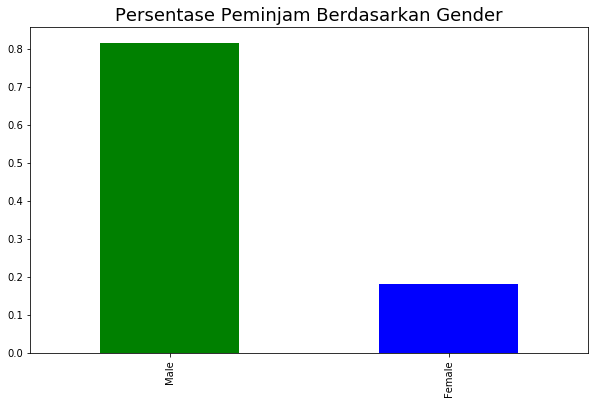

In [41]:
train['Gender'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Gender', size=18)
plt.show()
# sns.set_style('darkgrid')
# fig,ax = plt.subplots(figsize=(10, 6))
# sns.countplot(x = 'Gender', data = train, palette = 'inferno')
# ax.set_title('Gender', size=20)

# plt.show()

Berdasarkan gambar di atas, jumlah keseluruhan peminjam berdasarkan gender adalah 81% laki-laki dan 19% perempuan

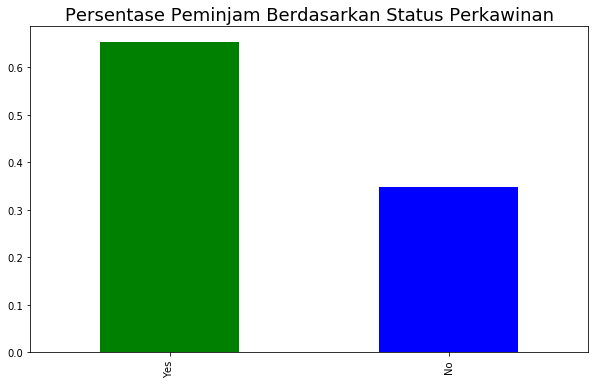

In [42]:
train['Married'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Status Perkawinan', size=18)
plt.show()

Peminjam yang berstatus sudah menikah sebesar 65% dan yang belum menikah 35%

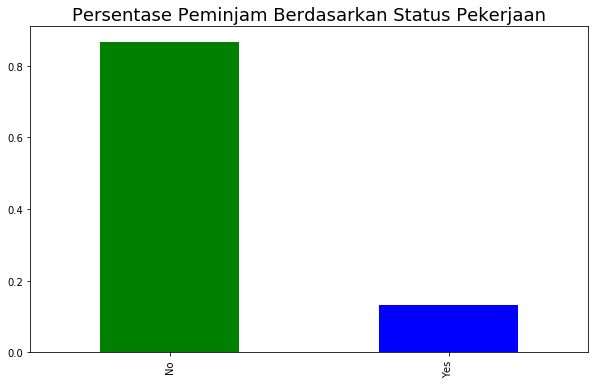

In [43]:
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Status Pekerjaan', size=18)
plt.show()

Peminjam didominasi oleh pekerja yang bekerja untuk orang lain sebesar 83%, sedangkan kaum freelancer atau yang memiliki usaha sendiri sebesar 17%

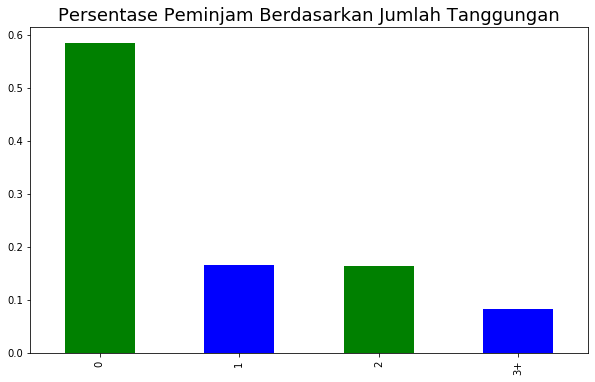

In [44]:
train['Dependents'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Jumlah Tanggungan', size=18)
plt.show()

Peminjam yang tidak memiliki tanggungan mendominasi dengan persentase 59%, memiliki 1 tanggungan sebesar 17%, memiliki 2 tanggungan sebesar 17%, dan memiliki 3 atau lebih tanggungan sebesar 7%

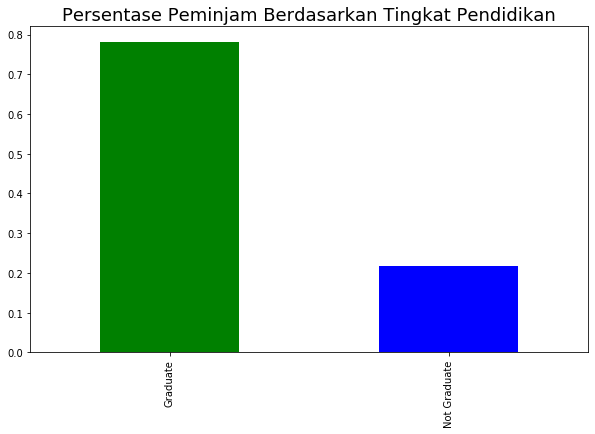

In [45]:
train['Education'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Tingkat Pendidikan', size=18)
plt.show()

Peminjam dengan status pendidikan yang sudah lulus sebesar 78% dan yang tidak lulus sebesar 22%

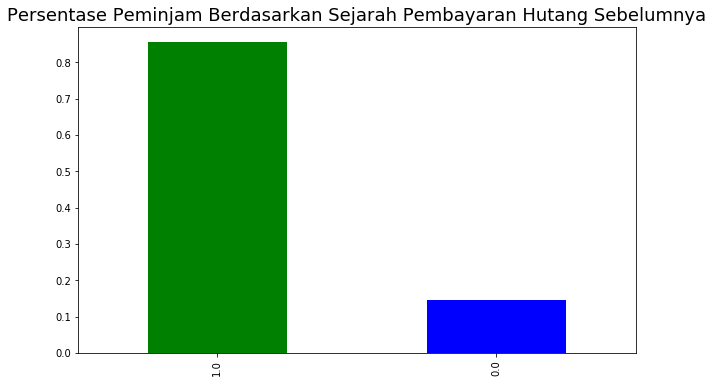

In [46]:
train['Credit_History'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Sejarah Pembayaran Hutang Sebelumnya', size=18)
plt.show()

Seseorang yang catatan pembayaran hutang sebelumnya bagus mengajukan peminjaman sebesar 85%, sedangkan yang catatannya buruk sebesar 15%.

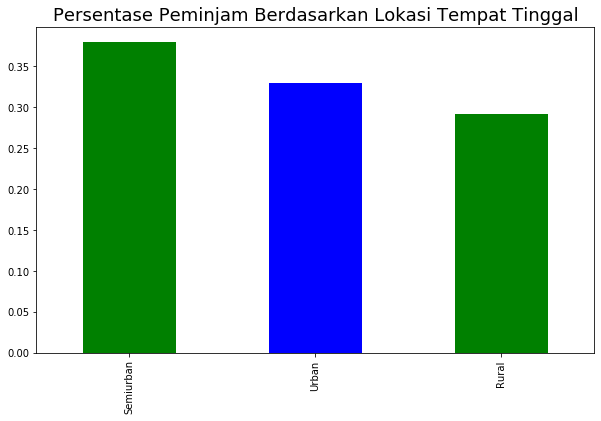

In [47]:
train['Property_Area'].value_counts(normalize=True).plot(kind='bar', figsize=(10,6), color=tuple(['g', 'b']))

plt.title('Persentase Peminjam Berdasarkan Lokasi Tempat Tinggal', size=18)
plt.show()

Peminjam yang bertempat tinggal di daerah kabupaten sebesar 38%, di kawasan perkotaan 33%, dan di kawasan desa sebesar 29%

**Training Set**

Membagi training data menjadi X dan y

In [48]:
X = train.iloc[:, 0:11].values
y = train.iloc[:, 11].values

X hanya mengambil 11 kolom pertama

y hanya mengambil kolom 12 atau terakhir

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


**Melakukan Encoding Categorical Data dan Independent Variable**

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Data Training
labelencoder_x = LabelEncoder()

#mengencode data kolom 1-5
for i in range (0,5):
    X[:, i] = labelencoder_x.fit_transform(X[:,i])
    

In [51]:
X[:, 10] = labelencoder_x.fit_transform(X[:, 10])

onehotencoder = OneHotEncoder(categorical_features=[[0],[1],[2],[3],[4],[10]],handle_unknown='ignore')

X = onehotencoder.fit_transform(X).toarray()

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [52]:
#Mengencode variabel target
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#validasi
# print (y)

In [53]:
X.shape

(614, 20)

Setelah dilakukan encoding, data training sekarang memiliki 614 baris dan 20 kolom

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [55]:
#import beberapa model
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(("CART", DecisionTreeClassifier(criterion = 'entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))

In [57]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticReg: 0.818328 (0.059266)
CART: 0.729457 (0.031287)
KNN: 0.653101 (0.072910)
KernelSVM: 0.704264 (0.069855)
NaiveBayes: 0.797342 (0.056654)
RandomForest: 0.778682 (0.054882)


In [58]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logreg.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 27  38]
 [  2 118]]


In [61]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.7837837837837838


In [62]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

